<h2>Importing all the essentails</h2>

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn.datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from xgboost import XGBRegressor

In [2]:
data = pd.read_csv('Dataset/Boston.csv')

In [3]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<h3>Adding a alternate to boston here</h3>

In [4]:
altboston = sklearn.datasets.fetch_california_housing()
print(altboston)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

<h3>adding the features name and price from the original dataset</h3>

In [5]:
data2 = pd.DataFrame(altboston.data,columns=altboston.feature_names)

In [6]:
data2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
data2['Price'] = altboston.target

In [8]:
data2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [64]:
data2.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [9]:
data2.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
data2.groupby('Price').mean()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
Price,,,,,,,,
0.14999,2.122475,30.750000,6.575951,2.016259,305.25000,2.566440,37.665000,-120.197500
0.17500,2.366700,39.000000,3.572464,1.217391,259.00000,1.876812,34.150000,-118.330000
0.22500,1.818075,36.250000,3.975628,1.265805,2112.00000,3.652335,36.005000,-119.335000
0.25000,0.857100,21.000000,1.629630,1.222222,64.00000,2.370370,32.790000,-114.650000
0.26600,2.301300,34.000000,4.897959,1.051020,808.00000,2.748299,35.130000,-119.450000
...,...,...,...,...,...,...,...,...
4.98800,8.248000,29.000000,7.072727,0.978182,826.00000,3.003636,37.330000,-122.060000
4.99000,8.148900,18.000000,6.600817,1.001362,1634.00000,2.226158,37.890000,-122.180000
4.99100,6.786100,28.000000,7.386861,1.083942,617.00000,2.251825,33.550000,-117.770000


In [11]:
data2.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


C:\Users\amane chor\AppData\Local\Temp\ipykernel_15952\1922000115.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['Price'])


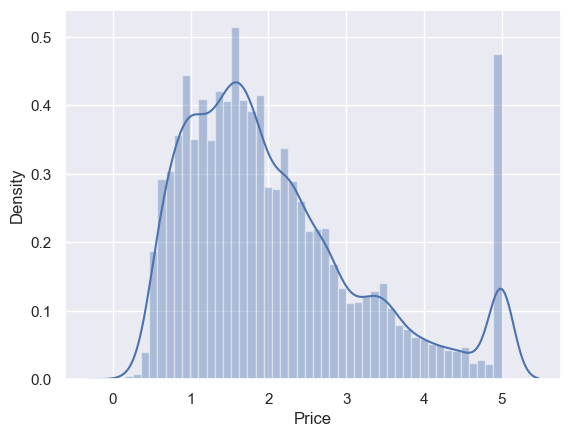

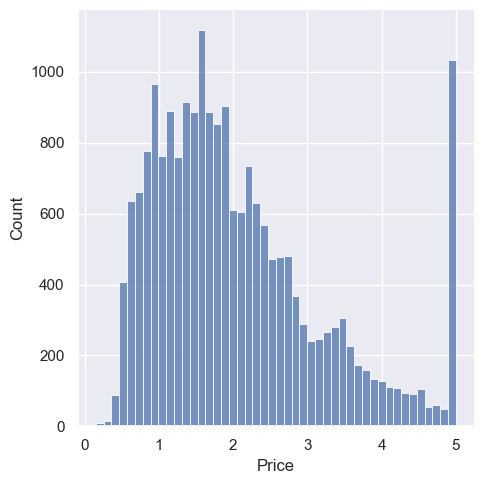

In [72]:
sns.set_theme
sns.distplot(data2['Price'])
sns.displot(data2['Price'])

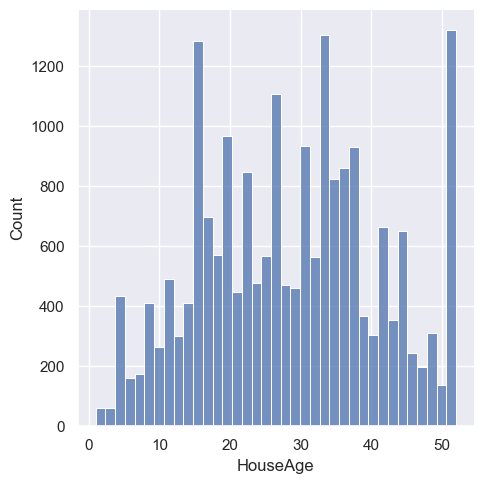

In [13]:
sns.displot(data2['HouseAge'])

<h3>Splitting the data to two parts for further operation</h3>

In [56]:
X = data2.drop(['Price'],axis=1)
Y = data2['Price']

<h3>NOw spliting the value to train and test value</h3>

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

<h3>To train the model</h3>

In [58]:
regressor = XGBRegressor()
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<h3>To check the accuracy of our trained model</h3>

In [59]:
train_predict = regressor.predict(X_train)
score1 = metrics.r2_score(Y_train,train_predict)
score2 = metrics.mean_absolute_error(Y_train,train_predict)
print(f'so the score of r2 is {score1}')
print(f'so the score of mean is {score2}')

so the score of r2 is 0.943650140819218
so the score of mean is 0.1933648700612105


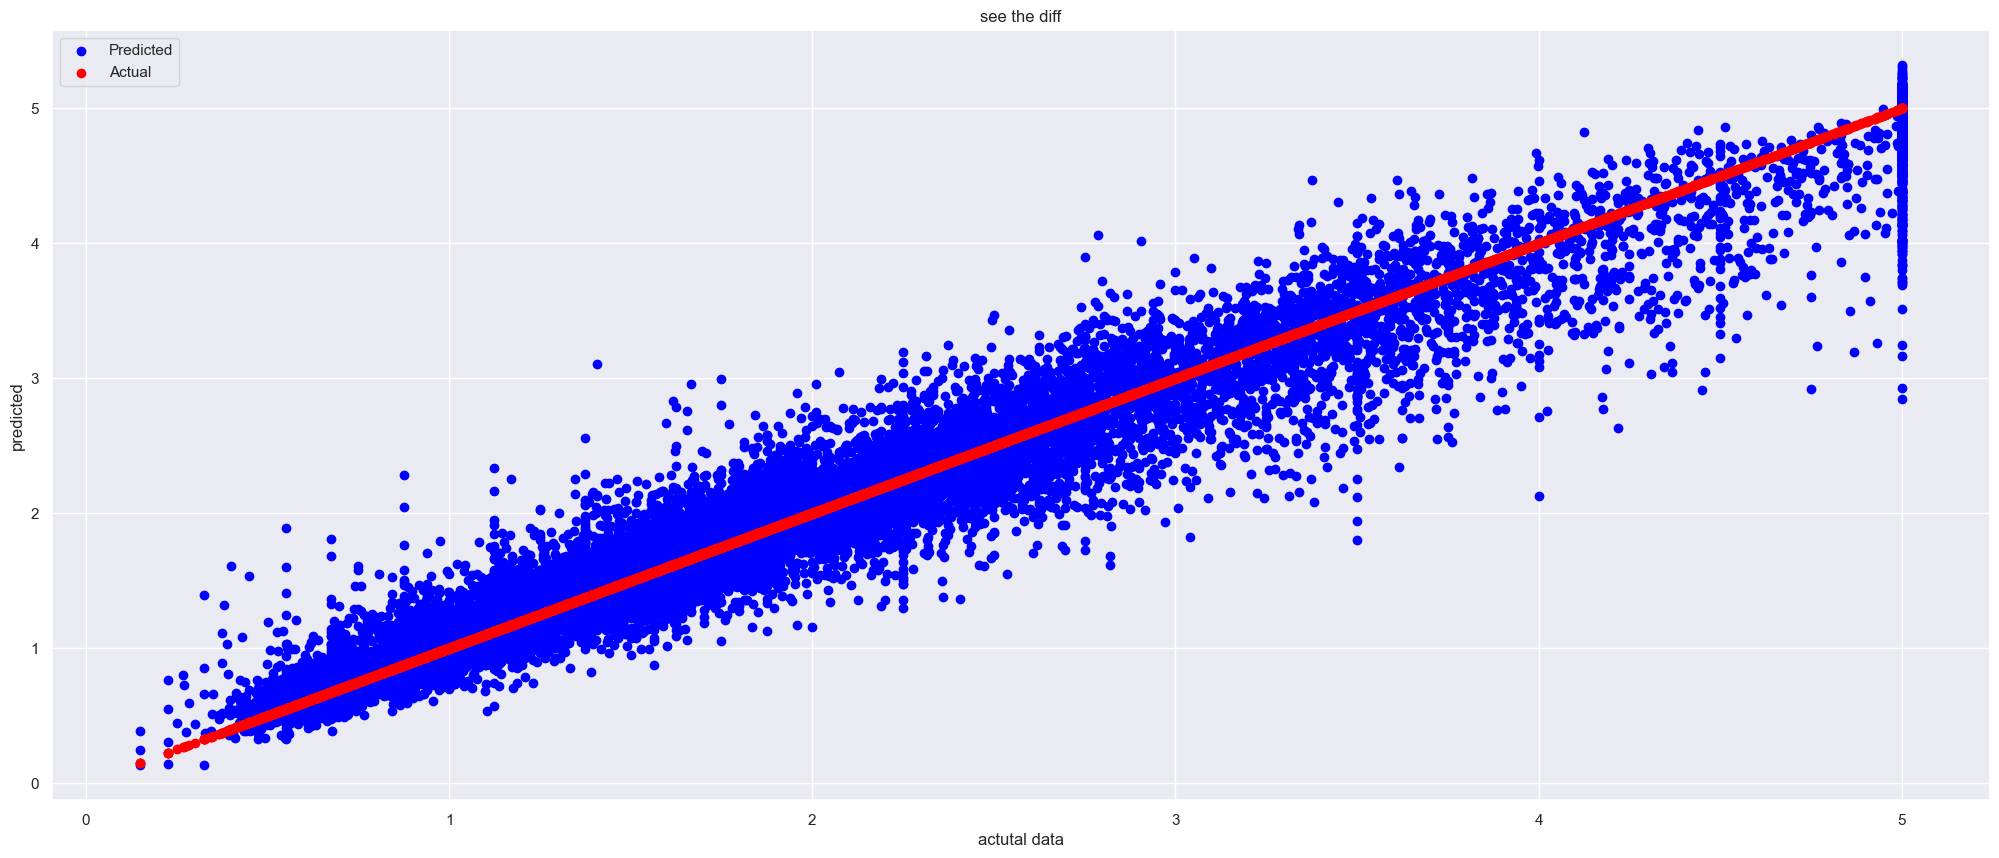

In [60]:
# Create a figure with a specified size
plt.figure(figsize=(25, 10))

# Scatter plot with different colors for actual and predicted data
plt.scatter(Y_train, train_predict, c='blue', label='Predicted')
plt.scatter(Y_train, Y_train, c='red', label='Actual')
plt.xlabel('actutal data')
plt.ylabel('predicted')
plt.title("see the diff")
plt.legend()
plt.show()

<h3>To check the accuracy of our test model</h3>

In [61]:
test_predict = regressor.predict(X_test)
score1 = metrics.r2_score(Y_test,test_predict)
score2 = metrics.mean_absolute_error(Y_test,test_predict)
print(f'so the score of r2 is {score1}')
print(f'so the score of mean is {score2}')

so the score of r2 is 0.8338000331788725
so the score of mean is 0.3108631800268186


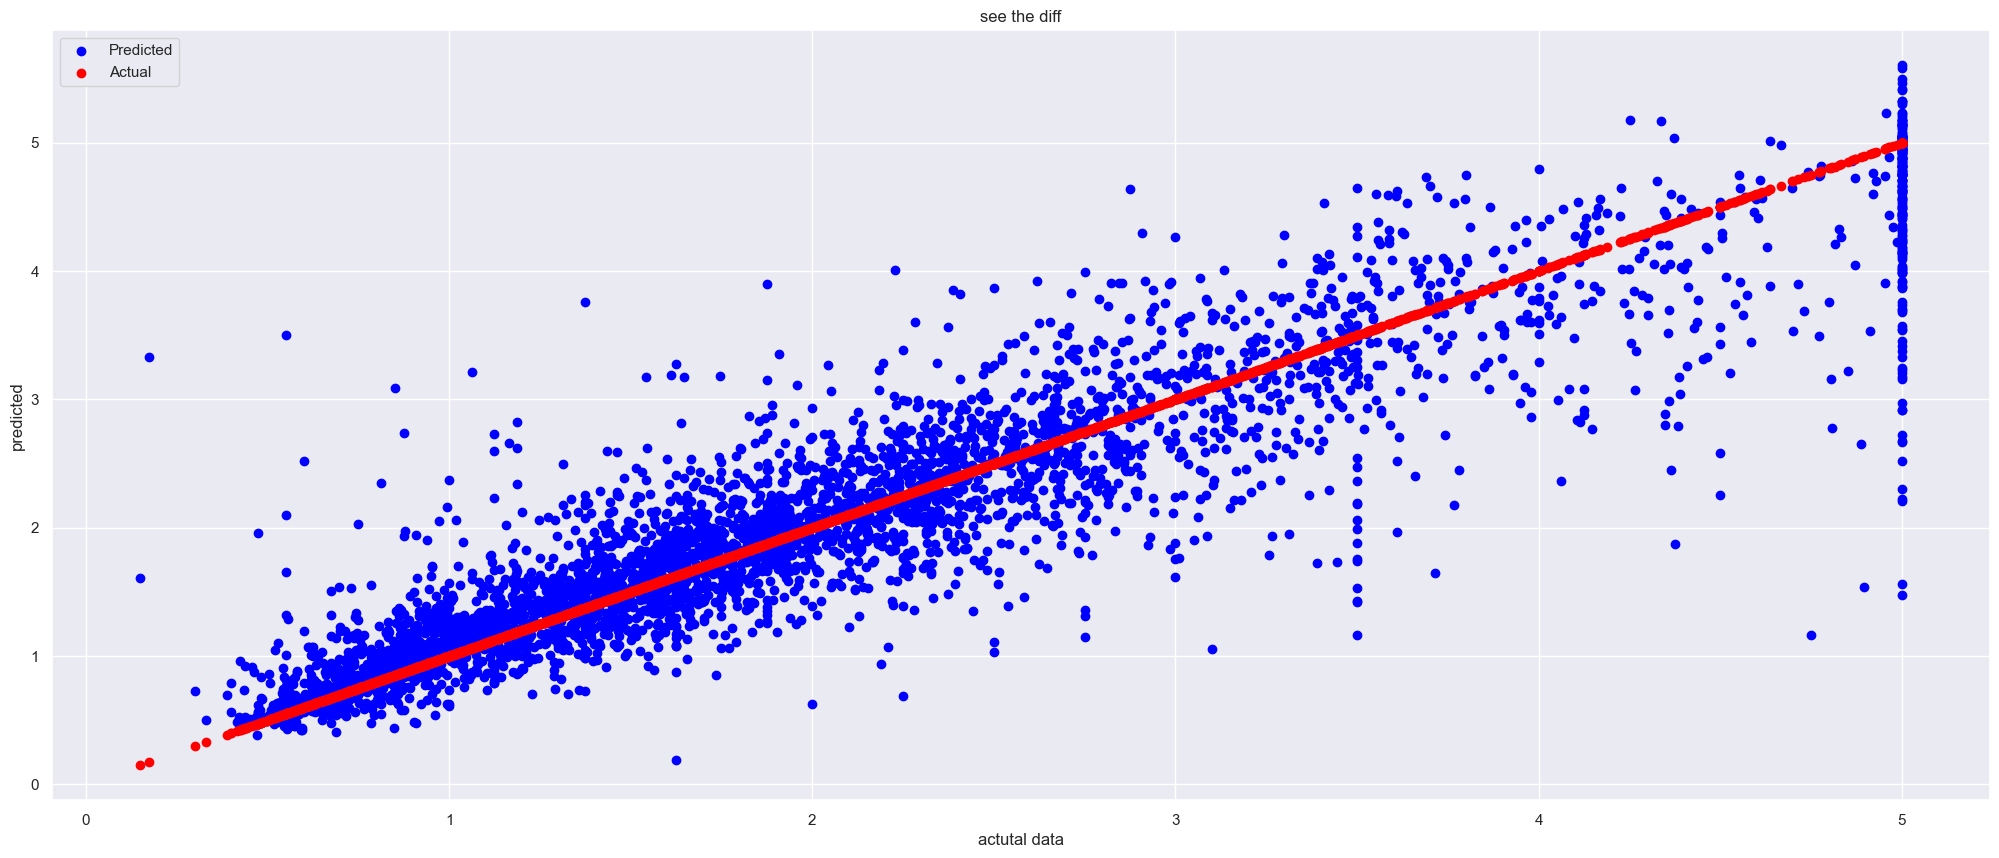

In [62]:
# Create a figure with a specified size
plt.figure(figsize=(25, 10))

# Scatter plot with different colors for actual and predicted data
plt.scatter(Y_test, test_predict, c='blue', label='Predicted')
plt.scatter(Y_test, Y_test, c='red', label='Actual')
plt.xlabel('actutal data')
plt.ylabel('predicted')
plt.title("see the diff")
plt.legend()
plt.show()

<h3>Pred 1</h3>

In [66]:
givendata = (1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09)
numpyarray = np.asarray(givendata)
reshaped = numpyarray.reshape(1,-1)
pred = regressor.predict(reshaped)
print(f'The prediction is {pred} which is fairly close to reals')

The prediction is [0.71600324] which is fairly close to reals


<h3>Pred 2</h3>

In [69]:
givendata = (3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25	)
numpyarray = np.asarray(givendata)
reshaped = numpyarray.reshape(1,-1)
pred = regressor.predict(reshaped)
print(f'The prediction is {pred} which is not so fairly close to reals')

The prediction is [2.293168] which is not so fairly close to reals
